# Drug classification

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 : Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("/workspaces/Drug-Classification/notebook/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Step 2 : Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

# Step 3 : Saperate X and Y(Drug)

In [6]:
X = df.drop(columns="Drug")
Y = df[["Drug"]]

In [7]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [9]:
Y.value_counts()

Drug 
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

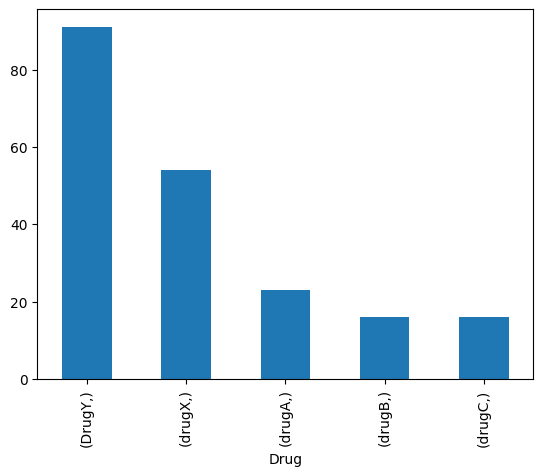

In [10]:
Y.value_counts().plot(kind="bar")

# Step 4 : Apply preprocessing on X

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['Sex', 'BP', 'Cholesterol']

In [14]:
con

['Age', 'Na_to_K']

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [16]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [17]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,0.0,0.0,0.0,0.0
1,0.162699,-0.415145,1.0,1.0,0.0,0.0
2,0.162699,-0.828558,1.0,1.0,0.0,0.0
3,-0.988614,-1.149963,0.0,0.0,1.0,0.0
4,1.011034,0.271794,0.0,1.0,0.0,0.0


# Step 5 : Apply train test split

In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.4, random_state=42)

In [20]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
2,0.162699,-0.828558,1.0,1.0,0.0,0.0
77,-1.109805,0.426945,0.0,0.0,0.0,1.0
46,-0.443255,-0.415423,0.0,0.0,0.0,0.0
187,0.162699,-0.788452,1.0,0.0,0.0,0.0
191,-1.291591,-1.120403,1.0,0.0,0.0,0.0


In [21]:
ytrain.head()

,Drug
2,drugC
77,DrugY
46,drugA
187,drugA
191,drugA


In [22]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,1.0,1.0,0.0,1.0
15,-1.715759,-0.078892,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,0.0,0.0,1.0,1.0
158,0.889843,-0.782762,0.0,1.0,0.0,0.0
128,0.162699,2.422679,1.0,1.0,0.0,1.0


In [23]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [24]:
xtrain.shape

(120, 6)

In [25]:
xtest.shape

(80, 6)

# Step 6 : Build a model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

In [27]:
model.score(xtrain, ytrain)

0.875

In [28]:
model.score(xtest, ytest)

0.8875

In [29]:
params = {"n_neighbors" : [6,7, 8, 9, 10, 11, 13,14]}
params

{'n_neighbors': [6, 7, 8, 9, 10, 11, 13, 14]}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring="f1_macro", n_jobs=-1)
rscv.fit(xtrain, ytrain)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=15),
                   n_jobs=-1,
                   param_distributions={'n_neighbors': [6, 7, 8, 9, 10, 11, 13,
                                                        14]},
                   scoring='f1_macro')

In [31]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=8)

In [32]:
best_knn.score(xtrain, ytrain)

0.9083333333333333

In [33]:
best_knn.score(xtest, ytest)

0.925

In [34]:
ytest_pred = best_knn.predict(xtest)
ytest_pred[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [35]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


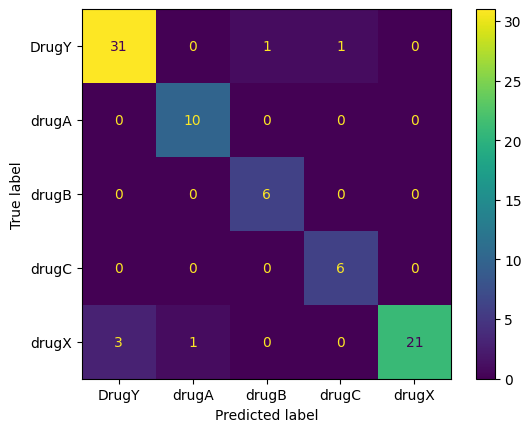

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions( ytest, ytest_pred)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

       DrugY       0.91      0.94      0.93        33
       drugA       0.91      1.00      0.95        10
       drugB       0.86      1.00      0.92         6
       drugC       0.86      1.00      0.92         6
       drugX       1.00      0.84      0.91        25

    accuracy                           0.93        80
   macro avg       0.91      0.96      0.93        80
weighted avg       0.93      0.93      0.92        80



# 5 fold cross validation report

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_knn, xtrain, ytrain, cv=5, scoring="f1_macro")

In [39]:
scores

array([0.97312253, 0.69878788, 0.82109253, 0.84463768, 0.9047619 ])

In [40]:
scores.mean()

np.float64(0.8484805050022443)

# Save the model objects

In [41]:
import joblib

In [42]:
joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [43]:
joblib.dump(best_knn, "model.joblib")

['model.joblib']

In [44]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [45]:
m = joblib.load("model.joblib")
m

KNeighborsClassifier(n_neighbors=8)

# Create a function to predict out of sample data

In [46]:
X.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [49]:
def predict_results(pre, model, age:int, sex:str, bp:str, cholestrol:str, na_to_k:float):
    # Get the data in dictionary format
    d = {
        "Age" : [age],
        "Sex" : [sex],
        "BP" : [bp],
        "Cholesterol" : [cholestrol],
        "Na_to_K" : [na_to_k]
    }
    d = [d]
    # Convert dictionary to dataframe
    xnew = pd.DataFrame(d)

    # Predict the results with probability
    preds = model.predict(xnew)
    probs = model.predict_proba(xnew)

    # Probs save as dictionary
    classes = model.classes_

    # Allpy for loop and save results in dictionary format
    prob_d = {}
    for c, p in zip(classes, probs):
        prob_d[c] = p

    # Return prediction woth probability
    return preds, prob_d

In [50]:
predict_results(pre, best_knn, 41,"M","LOW","HIGH",11.037)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
- BP
- Cholesterol
- Na_to_K
- Sex
Feature names seen at fit time, yet now missing:
- cat__BP_LOW
- cat__BP_NORMAL
- cat__Cholesterol_NORMAL
- cat__Sex_M
- num__Age
- ...
